# Loan Default Prediction

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/01_loans50k.csv', encoding = "ISO-8859-1")

**First I want to get an idea of the data so I look at the info, shape (number of rows & columns), first 5 entries (head), and the names of all of the features (columns). I decided to round the values to round the floats to 2 decimal points.**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loanID       50000 non-null  int64  
 1   amount       49999 non-null  float64
 2   term         49999 non-null  object 
 3   rate         49999 non-null  float64
 4   payment      49999 non-null  float64
 5   grade        49999 non-null  object 
 6   employment   47215 non-null  object 
 7   length       47319 non-null  object 
 8   home         49999 non-null  object 
 9   income       49999 non-null  float64
 10  verified     49999 non-null  object 
 11  status       49999 non-null  object 
 12  reason       49999 non-null  object 
 13  state        49999 non-null  object 
 14  debtIncRat   49999 non-null  float64
 15  delinq2yr    49999 non-null  float64
 16  inq6mth      49999 non-null  float64
 17  openAcc      49999 non-null  float64
 18  pubRec       49999 non-null  float64
 19  revo

In [4]:
df.shape

(50000, 32)

In [5]:
df.head().T

,0,1,2,3,4
loanID,188861,517703,268587,579902,617630
amount,8000.0,11000.0,35000.0,20000.0,12000.0
term,36 months,36 months,36 months,60 months,60 months
rate,0.14,0.1,0.15,0.12,0.12
payment,272.07,354.89,1220.33,447.83,266.88
grade,C,B,D,C,B
employment,Warehouseman,Vice President,Owner/Attorney,Analyst,medical technician
length,3 years,10+ years,10+ years,2 years,10+ years
home,RENT,MORTGAGE,RENT,MORTGAGE,MORTGAGE
income,49966.0,50000.0,360000.0,60000.0,64000.0


In [6]:
for col in df.columns:
    print(col)

loanID
amount
term
rate
payment
grade
employment
length
home
income
verified
status
reason
state
debtIncRat
delinq2yr
inq6mth
openAcc
pubRec
revolRatio
totalAcc
totalPaid
totalBal
totalRevLim
accOpen24
avgBal
bcOpen
bcRatio
totalLim
totalRevBal
totalBcLim
totalIlLim


In [7]:
df = df.round(2)

**Next I want to see what values are missing and what features have missing values. I noted that most features had 1 entry with missing values. Entry 34805 was empty except for the loanID. I deleted this entry.**

In [8]:
df.isna().sum()

loanID            0
amount            1
term              1
rate              1
payment           1
grade             1
employment     2785
length         2681
home              1
income            1
verified          1
status            1
reason            1
state             1
debtIncRat        1
delinq2yr         1
inq6mth           1
openAcc           1
pubRec            1
revolRatio       19
totalAcc          1
totalPaid         1
totalBal          1
totalRevLim       1
accOpen24         1
avgBal            1
bcOpen          489
bcRatio         521
totalLim          1
totalRevBal       1
totalBcLim        1
totalIlLim        1
dtype: int64

In [9]:
df[df['amount'].isna()].T

,34805
loanID,656728
amount,NaN
term,NaN
rate,NaN
payment,NaN
grade,NaN
employment,NaN
length,NaN
home,NaN
income,NaN


In [10]:
df.drop(index=df.index[34805], axis=0, inplace=True)
df = df.reset_index(drop=True)

**I made sure that all loanIDs were unique values.**

In [11]:
df['loanID'].value_counts().head()

188861    1
553003    1
307627    1
354168    1
392140    1
Name: loanID, dtype: int64

**Now that I've dropped the one row, I am left with 5 features that have missing values. <br>
It looks like there is a lot of overlap in missing values between employment/length and possibly bcOpen/bcRatio. In total 3285 rows have missing values.**

In [12]:
missing = pd.concat([df.isnull().sum(), (100 * df.isnull().mean()).round(2)], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False).head(5)

,count,%
employment,2784,5.57
length,2680,5.36
bcRatio,520,1.04
bcOpen,488,0.98
revolRatio,18,0.04


In [13]:
df[df.isna().any(axis=1)].T

,41,51,105,148,150,155,193,217,230,246,...,49869,49873,49905,49913,49914,49932,49943,49955,49995,49998
loanID,272229,290384,584627,161338,556421,256061,407049,268478,405948,261898,...,630735,112012,223019,632873,400200,459040,587777,624458,426438,500393
amount,20800.0,15625.0,30000.0,17550.0,5400.0,17500.0,14000.0,8350.0,4000.0,5100.0,...,15300.0,12000.0,10000.0,8000.0,4125.0,18000.0,16000.0,6400.0,26050.0,12000.0
term,36 months,36 months,60 months,60 months,36 months,36 months,36 months,36 months,36 months,36 months,...,60 months,60 months,36 months,36 months,36 months,60 months,36 months,36 months,60 months,36 months
rate,0.17,0.13,0.13,0.14,0.12,0.12,0.08,0.13,0.13,0.14,...,0.15,0.14,0.11,0.07,0.22,0.18,0.14,0.16,0.22,0.11
payment,736.93,523.39,677.85,412.83,178.15,581.17,438.0,282.07,135.42,173.49,...,363.91,279.1,327.34,248.82,157.52,455.72,546.77,223.72,719.33,392.81
grade,D,C,C,C,B,C,A,C,C,C,...,C,C,B,A,F,D,C,D,F,B
employment,NaN,NaN,NaN,NaN,NaN,NaN,Senior Digital Imaging Analyst,NaN,NaN,NaN,...,NaN,NaN,Direct of Software Development,NaN,NaN,NaN,X-ray tecgnologist,NaN,NaN,NaN
length,NaN,NaN,NaN,NaN,NaN,NaN,< 1 year,NaN,NaN,NaN,...,NaN,NaN,3 years,NaN,NaN,NaN,10+ years,NaN,NaN,NaN
home,MORTGAGE,MORTGAGE,MORTGAGE,MORTGAGE,RENT,OWN,RENT,MORTGAGE,MORTGAGE,RENT,...,OWN,MORTGAGE,RENT,MORTGAGE,RENT,MORTGAGE,MORTGAGE,MORTGAGE,MORTGAGE,RENT
income,75000.0,34000.0,334000.0,44146.0,28800.0,50000.0,130000.0,35988.72,55000.0,14500.0,...,40000.0,45249.0,130000.0,40000.0,13776.0,50000.0,100000.0,60000.0,56677.0,43680.0


**I want to take a look at the beginning stats for a feel of the data and look for anything that sticks out.**

In [14]:
overall_stats = round(df.describe(),2).T

In [15]:
overall_stats

,count,mean,std,min,25%,50%,75%,max
loanID,49999.0,327086.86,189492.01,16.00,163302.50,324657.00,491697.00,656727.00
amount,49999.0,15145.53,8527.77,1000.00,8500.00,13800.00,20000.00,35000.00
rate,49999.0,0.13,0.04,0.05,0.10,0.13,0.16,0.29
payment,49999.0,442.74,244.84,30.54,265.84,385.79,578.68,1407.01
income,49999.0,76173.79,65235.03,4000.00,46238.50,65000.00,90000.00,7446395.00
debtIncRat,49999.0,18.73,8.44,0.00,12.39,18.21,24.73,61.21
delinq2yr,49999.0,0.35,0.91,0.00,0.00,0.00,0.00,15.00
inq6mth,49999.0,0.64,0.94,0.00,0.00,0.00,1.00,6.00
openAcc,49999.0,11.85,5.52,1.00,8.00,11.00,15.00,76.00
pubRec,49999.0,0.23,0.62,0.00,0.00,0.00,0.00,28.00


**I suspect missing values for employment indicate applicant is unemployed. I check to see if there are any results for 'unemployed' that would susgest incorrect suspician. There are 0 results for 'unemployed' indicated suspicion is correct.**

In [16]:
df[df['employment'].str.lower()=='unemployed']

,loanID,amount,term,rate,payment,grade,employment,length,home,income,...,totalBal,totalRevLim,accOpen24,avgBal,bcOpen,bcRatio,totalLim,totalRevBal,totalBcLim,totalIlLim


**It looks like there is a large overlap between missing values for employment and length. I want to see how many entries have a missing value in one field, but not the other. There is a total of 148 entries that do not overlap. 126 of which 'Employment' is NaN & 'Length' has a value. For the remaining 22, 'Length' is NaN and 'Employment' has a value.**

In [17]:
missing_length = len(df[~df['employment'].isna() & df['length'].isna()])
missing_employment = len(df[df['employment'].isna() & ~df['length'].isna()])
missing_both = missing_length + missing_employment

In [18]:
print(f"There are total of {missing_both} entries missing either length or employment,\
\n{missing_length} missing just the length, and {missing_employment} missing just employment.")

There are total of 148 entries missing either length or employment,
22 missing just the length, and 126 missing just employment.


**Next I wanted to take a look at the what values don't overlap and what possible inputs were used for 'employment' and 'length'.**

In [19]:
diffs = df[(~df['employment'].isna() & df['length'].isna())  | (df['employment'].isna() & ~df['length'].isna())] 

In [20]:
diffs.T.head(10)

,744,1039,1621,2062,2116,2234,3183,3517,3945,4232,...,47771,47866,47873,48093,48441,48508,48826,49190,49291,49626
loanID,210787,293573,15642,404560,499541,212739,222002,204496,378218,228501,...,205922,206609,209889,230471,103029,212055,219774,203883,217539,205854
amount,30000.0,2500.0,35000.0,25000.0,5000.0,14325.0,15000.0,22400.0,12000.0,35000.0,...,20000.0,8400.0,35000.0,23325.0,6725.0,25000.0,35000.0,25000.0,13100.0,35000.0
term,36 months,36 months,60 months,36 months,36 months,60 months,36 months,36 months,36 months,36 months,...,36 months,36 months,36 months,36 months,36 months,36 months,60 months,36 months,36 months,36 months
rate,0.14,0.11,0.2,0.13,0.09,0.19,0.13,0.26,0.13,0.14,...,0.07,0.12,0.18,0.16,0.15,0.14,0.15,0.13,0.12,0.15
payment,1027.67,82.43,927.1,838.63,159.4,375.32,504.33,897.39,402.54,1195.88,...,614.08,278.97,1257.8,815.56,233.1,850.2,832.29,842.23,435.05,1218.61
grade,C,B,E,C,B,D,B,F,C,C,...,A,B,D,C,C,C,C,B,B,C
employment,NaN,NaN,NaN,NaN,Teacher,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,SALES ASSOCIATE,NaN,NaN,NaN,NaN,NaN
length,10+ years,5 years,9 years,10+ years,NaN,3 years,5 years,3 years,5 years,10+ years,...,10+ years,4 years,10+ years,10+ years,NaN,10+ years,10+ years,10+ years,9 years,10+ years
home,OWN,RENT,MORTGAGE,RENT,RENT,MORTGAGE,OWN,RENT,MORTGAGE,MORTGAGE,...,MORTGAGE,MORTGAGE,OWN,RENT,MORTGAGE,MORTGAGE,MORTGAGE,MORTGAGE,RENT,MORTGAGE
income,150000.0,16500.0,125000.0,67000.0,27000.0,43500.0,45000.0,75000.0,80000.0,150000.0,...,147000.0,65000.0,500000.0,125000.0,35000.0,60000.0,154000.0,200000.0,70000.0,84000.0


In [21]:
diffs['employment'].unique()

array([nan, 'Teacher', 'Consultant', 'Chiropractor - owner', 'Owner',
       'teachet', 'ISS Coordinator', 'Cashier', 'Mechanic',
       'Administrative Assistant', 'Residency Director', 'driver',
       'Program Analyst', 'Therapist ', 'Broker Associate',
       'Pipe fitter ', 'crane operator', 'H', 'HR Coordinator',
       'fan-host', 'Foster Grandparent', 'Home Health', 'SALES ASSOCIATE'],
      dtype=object)

In [22]:
diffs['length'].unique()

array(['10+ years', '5 years', '9 years', nan, '3 years', '< 1 year',
       '4 years', '8 years', '2 years', '7 years', '6 years'],
      dtype=object)

In [23]:
df['length'].value_counts()

10+ years    16896
2 years       4456
< 1 year      3985
3 years       3939
1 year        3215
5 years       2946
4 years       2944
8 years       2528
7 years       2333
6 years       2185
9 years       1892
Name: length, dtype: int64

**For entries with missing value for length, but has a value for employment: I filled in length with the mean of '6 years' <br>
For entries with a missing value for employment, but a value for length: I filled in with '0 years' <br>
For the remaining that were missing both employment & length, I filled in with 'unemployed' & '0 years'**

In [24]:
df.loc[(~df['employment'].isna()) & (df['length'].isna()), 'length']= '6 years'
df.loc[(df['employment'].isna()) & (~df['length'].isna()), 'length']= '0 years'
df.fillna({'employment': 'Unemployed', 'length':'0 years'}, inplace=True)

In [25]:
diffs_ratios = df[df['bcRatio'].isna() & ~df['bcOpen'].isna()] 

In [26]:
len(diffs_ratios)

32

In [27]:
diffs_ratios.T.tail(10)

,604,1227,6069,6644,6981,7151,10189,10636,11326,11443,...,27960,31752,35990,37388,38461,39477,41369,41981,46694,48298
totalBal,25050.0,20951.0,9119.0,331044.0,33012.0,374941.0,386060.0,44442.0,85864.0,132033.0,...,103354.0,14635.0,67897.0,28028.0,26312.0,100253.0,40424.0,370108.0,65005.0,24412.0
totalRevLim,5100.0,1600.0,12300.0,11900.0,6500.0,14300.0,34000.0,6600.0,13500.0,82800.0,...,7600.0,14100.0,10500.0,1500.0,13300.0,18400.0,12700.0,36000.0,15100.0,4900.0
accOpen24,1.0,0.0,2.0,6.0,0.0,6.0,2.0,5.0,1.0,1.0,...,0.0,3.0,7.0,1.0,11.0,1.0,3.0,1.0,3.0,5.0
avgBal,4175.0,4190.0,1824.0,30095.0,4127.0,62490.0,96515.0,3174.0,17173.0,18862.0,...,10335.0,2927.0,11316.0,5606.0,2392.0,11139.0,5775.0,92527.0,5910.0,4069.0
bcOpen,234.0,140.0,2194.0,57.0,734.0,108.0,0.0,339.0,1587.0,7430.0,...,549.0,254.0,3598.0,500.0,363.0,665.0,0.0,1028.0,6394.0,80.0
bcRatio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
totalLim,26847.0,28414.0,22500.0,353774.0,34250.0,376292.0,417565.0,42721.0,104400.0,205483.0,...,88863.0,24373.0,77541.0,41652.0,43365.0,108841.0,101001.0,385711.0,88139.0,38371.0
totalRevBal,25050.0,20951.0,9119.0,52760.0,33012.0,46289.0,87488.0,44442.0,85864.0,132033.0,...,103354.0,14635.0,67897.0,28028.0,26312.0,100253.0,40424.0,87197.0,65005.0,24412.0
totalBcLim,4100.0,1000.0,4600.0,1600.0,6500.0,300.0,34000.0,2600.0,7500.0,52300.0,...,3100.0,6500.0,5500.0,500.0,2200.0,3500.0,4500.0,35000.0,8300.0,500.0
totalIlLim,21747.0,22976.0,10200.0,49874.0,27750.0,33340.0,26490.0,36121.0,90900.0,92546.0,...,81263.0,7036.0,66522.0,40152.0,30065.0,90441.0,88301.0,65511.0,73039.0,33471.0


**For the records that have a value for bcOpen but are missing for bcRatio, I calculated the bcRatio. <br> 
This takes care of 32 of the entries.**

In [28]:
bcRatio = round(((df['totalBcLim'] - df['bcOpen']) / df['totalBcLim']) * 100, 2)

In [29]:
df = df.fillna({'bcRatio': bcRatio})

**I took another look at 'bcOpen', 'bcRatio' and 'revolRatio' to get a sense of what value might should be used to fill in the missing.**

In [30]:
print(df['bcOpen'].describe())

count     49511.000000
mean       9154.930945
std       14296.865563
min           0.000000
25%        1235.000000
50%        4052.000000
75%       10868.500000
max      373005.000000
Name: bcOpen, dtype: float64


In [31]:
print(df['bcRatio'].describe())

count    49511.000000
mean        63.198097
std         27.206133
min          0.000000
25%         43.100000
50%         67.100000
75%         87.000000
max        161.000000
Name: bcRatio, dtype: float64


In [32]:
print(df['revolRatio'].describe())

count    49981.000000
mean         0.546419
std          0.236451
min          0.000000
25%          0.370000
50%          0.550000
75%          0.730000
max          1.670000
Name: revolRatio, dtype: float64


**I decided to use the mean to fill in missing values for bcOpen, bcRatio and revolRatio. The mean looks like the  best overall representation of the data.**

In [33]:
df['bcOpen'].fillna(round(df['bcOpen'].mean(),2), inplace=True)
df['bcRatio'].fillna(round(df['bcRatio'].mean(),2), inplace=True)
df['revolRatio'].fillna(round(df['revolRatio'].mean(),2), inplace=True)

**Confirm no missing values exist now.**

In [34]:
missing = pd.concat([df.isnull().sum(), (100 * df.isnull().mean()).round(2)], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False).head(8)

,count,%
loanID,0,0.0
amount,0,0.0
totalBcLim,0,0.0
totalRevBal,0,0.0
totalLim,0,0.0
bcRatio,0,0.0
bcOpen,0,0.0
avgBal,0,0.0


**I checked how many states were represented (49 - all but Iowa) in the data and which states had the most records (California).**

In [35]:
len(df['state'].unique())

49

In [36]:
df['state'].value_counts().head(5)

CA    6842
NY    4121
TX    4081
FL    3366
IL    2035
Name: state, dtype: int64

**I wanted to check to see if the reason for the loans were consistent or needed to be grouped. They look good and don't need to be updated.**

In [37]:
df['reason'].unique()

array(['credit_card', 'debt_consolidation', 'other', 'car',
       'home_improvement', 'vacation', 'medical', 'small_business',
       'house', 'moving', 'major_purchase', 'renewable_energy', 'wedding'],
      dtype=object)

In [38]:
len(df['reason'].unique())

13

**I notice there are a few exceptionally high salaries so I check those out. The ones below $3,000,000 make sense but the two above do not make sense. I could either change the values by taking off a decimal or I can delete those records. Because I can't be certain what the error is, I decided to delete those two entries.**

In [39]:
df[df['income']>1000000].T

,1615,4579,5258,6480,21147,21261,27683,29385,30315,37549,42190
loanID,257647,73926,213797,303676,140686,397230,265908,499888,554166,47943,221297
amount,35000.0,28000.0,25000.0,14000.0,20000.0,27575.0,35000.0,35000.0,25000.0,17600.0,20000.0
term,36 months,36 months,36 months,36 months,60 months,36 months,60 months,36 months,36 months,36 months,36 months
rate,0.14,0.06,0.11,0.08,0.13,0.12,0.21,0.08,0.17,0.11,0.08
payment,1190.62,852.2,818.35,438.0,454.96,919.71,946.68,1095.0,891.2,576.12,623.23
grade,C,A,B,A,C,C,E,A,D,B,A
employment,radiologist,Portfolio Manager,Managing Director,Managing Director,test technician,sales director,Managing Director,sales,Owner,Commercial Finance Manager,Registered Nurse
length,10+ years,10+ years,4 years,2 years,10+ years,< 1 year,10+ years,5 years,6 years,2 years,5 years
home,MORTGAGE,MORTGAGE,MORTGAGE,MORTGAGE,MORTGAGE,RENT,RENT,OWN,MORTGAGE,RENT,RENT
income,2500000.0,1100000.0,1400000.0,1100000.0,4560077.0,1300001.0,1500000.0,1300000.0,1250000.0,1950000.0,7446395.0


In [40]:
df.drop([42190, 21147], inplace=True)

**I checked the upper and lower limits for interest rates. Both make sense. The top rate of 29% has only been given to loans with a grade of "G" (the most risky grade) and loans with 5% are only given to those with the safest grade of "A".**

In [41]:
df[df['rate']>.28].T

,14880,15998,19982,29477,34621,38635,38748
loanID,431878,377010,358505,408805,472195,493559,238317
amount,14700.0,17600.0,31050.0,35000.0,21525.0,16675.0,18225.0
term,60 months,60 months,60 months,60 months,60 months,60 months,60 months
rate,0.29,0.29,0.29,0.29,0.29,0.29,0.29
payment,466.52,558.55,985.4,1110.76,683.12,529.2,578.39
grade,G,G,G,G,G,G,G
employment,courier,Registered Sleep Technologist,Sales,SALES,Senior business affairs manager,Subornation Specialist,IT Manager
length,7 years,10+ years,3 years,8 years,2 years,10+ years,3 years
home,RENT,MORTGAGE,RENT,RENT,RENT,MORTGAGE,RENT
income,49000.0,55000.0,89000.0,300000.0,120000.0,35000.0,50000.0


In [42]:
df[df['rate']<.06].T

,54,135,204,231,302,373,382,431,487,499,...,49521,49533,49589,49592,49603,49689,49705,49881,49928,49957
loanID,368362,433247,264300,281259,511401,298714,244628,369920,445080,516407,...,448339,305191,253538,310318,399295,236482,237524,428694,294859,276036
amount,15000.0,22800.0,10000.0,10000.0,25000.0,5000.0,20000.0,12000.0,20000.0,25000.0,...,10000.0,20000.0,22200.0,8000.0,25200.0,18000.0,15000.0,15000.0,5525.0,8400.0
term,36 months,36 months,36 months,36 months,36 months,36 months,36 months,36 months,36 months,36 months,...,36 months,36 months,36 months,36 months,36 months,36 months,36 months,36 months,36 months,36 months
rate,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05
payment,451.73,686.62,301.15,301.15,752.87,150.58,602.3,361.38,602.3,752.87,...,301.15,602.3,668.55,240.92,758.9,542.07,451.73,451.73,166.39,252.97
grade,A,A,A,A,A,A,A,A,A,A,...,A,A,A,A,A,A,A,A,A,A
employment,director of administration,Director Innovation,mechanic,Registered Nurse,Psychologist,Purchase Requisiton Manager,Secretary,Court Reporter,Interior Design/ Owner,Exchange Engineer,...,Certified Registered Nurse Anesthetist,Police Dispatcher II,ERP BI Developer 3,Teacher,Financial Project Manager,Waiver Support Coordinator,Sales representative,Chief Financial Officer,Petty Officer 2nd Class,Mari technologist
length,10+ years,10+ years,3 years,2 years,10+ years,10+ years,10+ years,10+ years,6 years,5 years,...,7 years,10+ years,3 years,7 years,10+ years,10+ years,3 years,< 1 year,7 years,10+ years
home,MORTGAGE,MORTGAGE,MORTGAGE,RENT,MORTGAGE,RENT,MORTGAGE,MORTGAGE,RENT,MORTGAGE,...,MORTGAGE,MORTGAGE,RENT,RENT,MORTGAGE,OWN,RENT,RENT,MORTGAGE,MORTGAGE
income,76400.0,225000.0,65000.0,75000.0,225000.0,70000.0,80000.0,180000.0,72000.0,87000.0,...,150000.0,65000.0,120000.0,48000.0,83000.0,76000.0,103000.0,120000.0,68000.0,64000.0


**Next I checked the top end of 'debtIncRat', 'delinq2yr', 'openAcc'. Nothing looks like it needs to be discarded.**

In [43]:
df[df['debtIncRat']>40].T

,134,8796,14372,23811,40114,40528
loanID,342176,255914,315171,292728,254429,288004
amount,18000.0,12000.0,5000.0,5000.0,12000.0,9600.0
term,60 months,60 months,36 months,36 months,36 months,36 months
rate,0.19,0.18,0.14,0.14,0.15,0.14
payment,462.49,303.81,170.87,170.09,418.4,329.65
grade,E,D,C,C,D,C
employment,Teaching Assistant,technician,reatail,photo tech,Unemployed,New Loans
length,10+ years,1 year,10+ years,8 years,0 years,< 1 year
home,RENT,OWN,MORTGAGE,MORTGAGE,OWN,RENT
income,21559.0,50000.0,35000.0,25000.0,20239.0,25000.0


In [44]:
df[df['delinq2yr']>12].T

,2742,4197,17125,32762,33860,36365,36782,37772,42077,44604
loanID,61162,572280,582522,573819,333905,410233,111287,150403,610104,200096
amount,3600.0,5050.0,20000.0,25000.0,10000.0,20000.0,14000.0,3000.0,23125.0,6000.0
term,36 months,36 months,36 months,36 months,36 months,60 months,60 months,36 months,60 months,36 months
rate,0.15,0.15,0.09,0.11,0.08,0.17,0.19,0.12,0.16,0.15
payment,124.78,174.2,637.58,818.35,312.86,496.95,363.1,99.18,557.58,208.91
grade,C,C,B,B,A,D,E,B,D,C
employment,Postdoctoral Fellow,wine consultant,"Sr. Paralegal Specialist, USDOJ-Tax Div.",Assistant Clinical Director,Health Communicator,Unemployed,Business Development Director,Phlebotomist,Owner,VP - Human Resources
length,2 years,10+ years,4 years,3 years,1 year,0 years,10+ years,3 years,3 years,2 years
home,RENT,MORTGAGE,RENT,MORTGAGE,MORTGAGE,RENT,MORTGAGE,MORTGAGE,MORTGAGE,RENT
income,45500.0,119000.0,58895.8,154000.0,70000.0,150000.0,145000.0,44000.0,67000.0,242000.0


In [45]:
df[df['openAcc']>50].sort_values('openAcc', ascending=False).T

,35733,45738,49608,3731,12341,44868,11505,11233,32823,42687,46954,48695,15640,26785,32420,42451
loanID,118318,53725,376300,449351,501632,88612,624704,35914,280959,5709,71778,623167,317698,435510,545375,641270
amount,18950.0,6000.0,28000.0,24975.0,8000.0,24000.0,35000.0,16800.0,12000.0,34000.0,24000.0,15000.0,28000.0,25000.0,2500.0,35000.0
term,60 months,36 months,60 months,36 months,36 months,60 months,36 months,60 months,36 months,60 months,60 months,36 months,36 months,36 months,36 months,60 months
rate,0.21,0.06,0.15,0.08,0.07,0.26,0.22,0.16,0.05,0.13,0.1,0.14,0.13,0.16,0.08,0.11
payment,512.56,192.88,660.99,784.71,246.62,716.16,1336.49,405.08,361.38,773.44,511.71,510.2,947.89,874.12,78.22,768.69
grade,E,B,C,B,A,G,E,D,A,C,B,C,C,D,A,B
employment,Sales Associate,Engineering Tech,Accountant Supervisor,Driector Of Operations,Attorney,Director of Curriculum,Family Nurse Practioner,Human Resources Specialist,Police Detective,Global Equity Mutual Fund Product Mgr,DSDM,Director,RN,court interpreter,Office Manager,Systems Architect
length,7 years,5 years,10+ years,10+ years,10+ years,1 year,3 years,< 1 year,10+ years,7 years,10+ years,10+ years,2 years,10+ years,10+ years,10+ years
home,RENT,MORTGAGE,MORTGAGE,OWN,MORTGAGE,MORTGAGE,MORTGAGE,RENT,OWN,RENT,OWN,MORTGAGE,MORTGAGE,RENT,MORTGAGE,MORTGAGE
income,47400.0,67800.0,85000.0,250000.0,200000.0,124000.0,120000.0,39000.0,75000.0,136000.0,98000.0,200000.0,95000.0,81000.0,103000.0,102000.0


**I checked 'pubRec'. Record 17453 is suspicious with 28 public records. 
(The number of derogatory public records including bankruptcy filings, tax liens, etc.)
Mean across full dataset is 0.232925. I have decided to leave it.**

In [46]:
df[df['pubRec']>15].T

,17453,23447
loanID,293481,414938
amount,7000.0,2000.0
term,36 months,36 months
rate,0.11,0.17
payment,230.8,71.3
grade,B,D
employment,general manager,restaurant general manager
length,< 1 year,7 years
home,OWN,RENT
income,45000.0,56000.0


**There are some very large numbers in totalAcc but none that seem like they should be discarded.**

In [47]:
df[df['totalAcc']>100].T

,4260,11737,20811,21308,21424,23879,40110
loanID,239502,262838,632906,383937,331895,335156,416737
amount,33750.0,18800.0,35000.0,18000.0,12300.0,18825.0,25000.0
term,60 months,60 months,36 months,36 months,36 months,36 months,36 months
rate,0.16,0.26,0.19,0.18,0.22,0.12,0.17
payment,816.62,562.77,1287.22,646.87,469.68,621.05,891.2
grade,D,F,E,D,F,B,D
employment,Attorney,Dispatcher,IT Manager,CNC Technician,maintenance suppervisor,Maintenance Tech,Project Coordinator
length,4 years,1 year,10+ years,3 years,10+ years,10+ years,2 years
home,MORTGAGE,OWN,MORTGAGE,MORTGAGE,OWN,RENT,MORTGAGE
income,67500.0,54000.0,185000.0,87000.0,42000.0,78000.0,65000.0


**Nothing suspicious in the totalBal top values.**

In [48]:
df[df['totalBal']>2000000].T

,1543,4419,4579,12807,27006,36870,45832
loanID,362238,354098,73926,219355,489373,615869,229933
amount,24000.0,20000.0,28000.0,30000.0,35000.0,23075.0,35000.0
term,36 months,60 months,36 months,36 months,60 months,36 months,36 months
rate,0.13,0.18,0.06,0.14,0.24,0.12,0.21
payment,812.48,503.21,852.2,1018.5,1006.68,770.73,1327.27
grade,C,D,A,B,F,C,E
employment,President North America,Director,Portfolio Manager,CEO,Vice President for Business Development,CEO,Unemployed
length,2 years,2 years,10+ years,5 years,8 years,10+ years,0 years
home,OWN,OWN,MORTGAGE,MORTGAGE,MORTGAGE,MORTGAGE,OWN
income,700000.0,550000.0,1100000.0,480000.0,357000.0,385000.0,920000.0


**Record 22161 looks to be very suspicious. The totalRevLim and totalLim are  inconsistent with the rest of their data. I have opted to delete this record.**

In [49]:
df[df['totalRevLim']>1000000].T

,105,22161,45832
loanID,584627,497788,229933
amount,30000.0,5000.0,35000.0
term,60 months,36 months,36 months
rate,0.13,0.1,0.21
payment,677.85,161.32,1327.27
grade,C,B,E
employment,Unemployed,teacher,Unemployed
length,0 years,10+ years,0 years
home,MORTGAGE,MORTGAGE,OWN
income,334000.0,30000.0,920000.0


In [50]:
df.drop(22161, inplace=True)

**'accOpen24 has some very high values but nothing to delete.**

In [51]:
df[df['accOpen24']>30].T

,8823,26011,29614,37275,43599,43860
loanID,363480,67481,402032,587576,237852,384539
amount,21000.0,5000.0,9600.0,15000.0,12000.0,20000.0
term,60 months,36 months,36 months,60 months,36 months,60 months
rate,0.23,0.15,0.12,0.18,0.11,0.19
payment,591.88,173.31,316.71,382.95,395.6,520.91
grade,F,C,B,E,B,E
employment,Senior Project Manager,Field Engineer,Driver/ Chief Union Steward,Controller,vent operator,Director of Sales
length,10+ years,3 years,10+ years,1 year,10+ years,7 years
home,RENT,MORTGAGE,MORTGAGE,OWN,MORTGAGE,MORTGAGE
income,142000.0,52000.0,135000.0,65000.0,53000.0,190000.0


**Next I wanted to look at the different status categories. For the purpose of looking for defaults, I have grouped the 7 categories into 3: Current, Late & Default.**

In [52]:
df['status'].unique()

array(['Charged Off', 'Fully Paid', 'Current', 'In Grace Period',
       'Late (16-30 days)', 'Late (31-120 days)', 'Default'], dtype=object)

In [53]:
status_summary = pd.concat([df['status'].value_counts(), (100 * df['status'].value_counts() / len(df['status'])).round(3)], axis=1)
status_summary.columns=['total', '%']
status_summary.sort_values(by='total', ascending=False)

,total,%
Fully Paid,27073,54.150
Current,14531,29.064
Charged Off,7578,15.157
Late (31-120 days),449,0.898
In Grace Period,261,0.522
Late (16-30 days),102,0.204
Default,2,0.004


In [54]:
df['status'] = df['status'].replace(['Fully Paid', 'Current'], 'Current')
df['status'] = df['status'].replace(['Late (31-120 days)', 'Late (16-30 days)', 'In Grace Period'], 'Late')
df['status'] = df['status'].replace(['Charged Off', 'Default'], 'Default')

**Now that I have my 3 groups, I check to see how many records fit into each of the 3 groups.**

In [55]:
status_summary = pd.concat([df['status'].value_counts(), (100 * df['status'].value_counts() / len(df['status'])).round(3)], axis=1)
status_summary.columns=['total', '%']
status_summary.sort_values(by='total', ascending=False)

,total,%
Current,41604,83.215
Default,7580,15.161
Late,812,1.624


**Since the goal is to predict either Default or Current, I have opted to remove all observations in the 'Late' status. Fortunately, this is only 1.6% of the total remaining observations.**

In [56]:
df = df[df['status'] != 'Late']

**I checked the histograms for each feature to get an overall feel of the data and their distributions.**

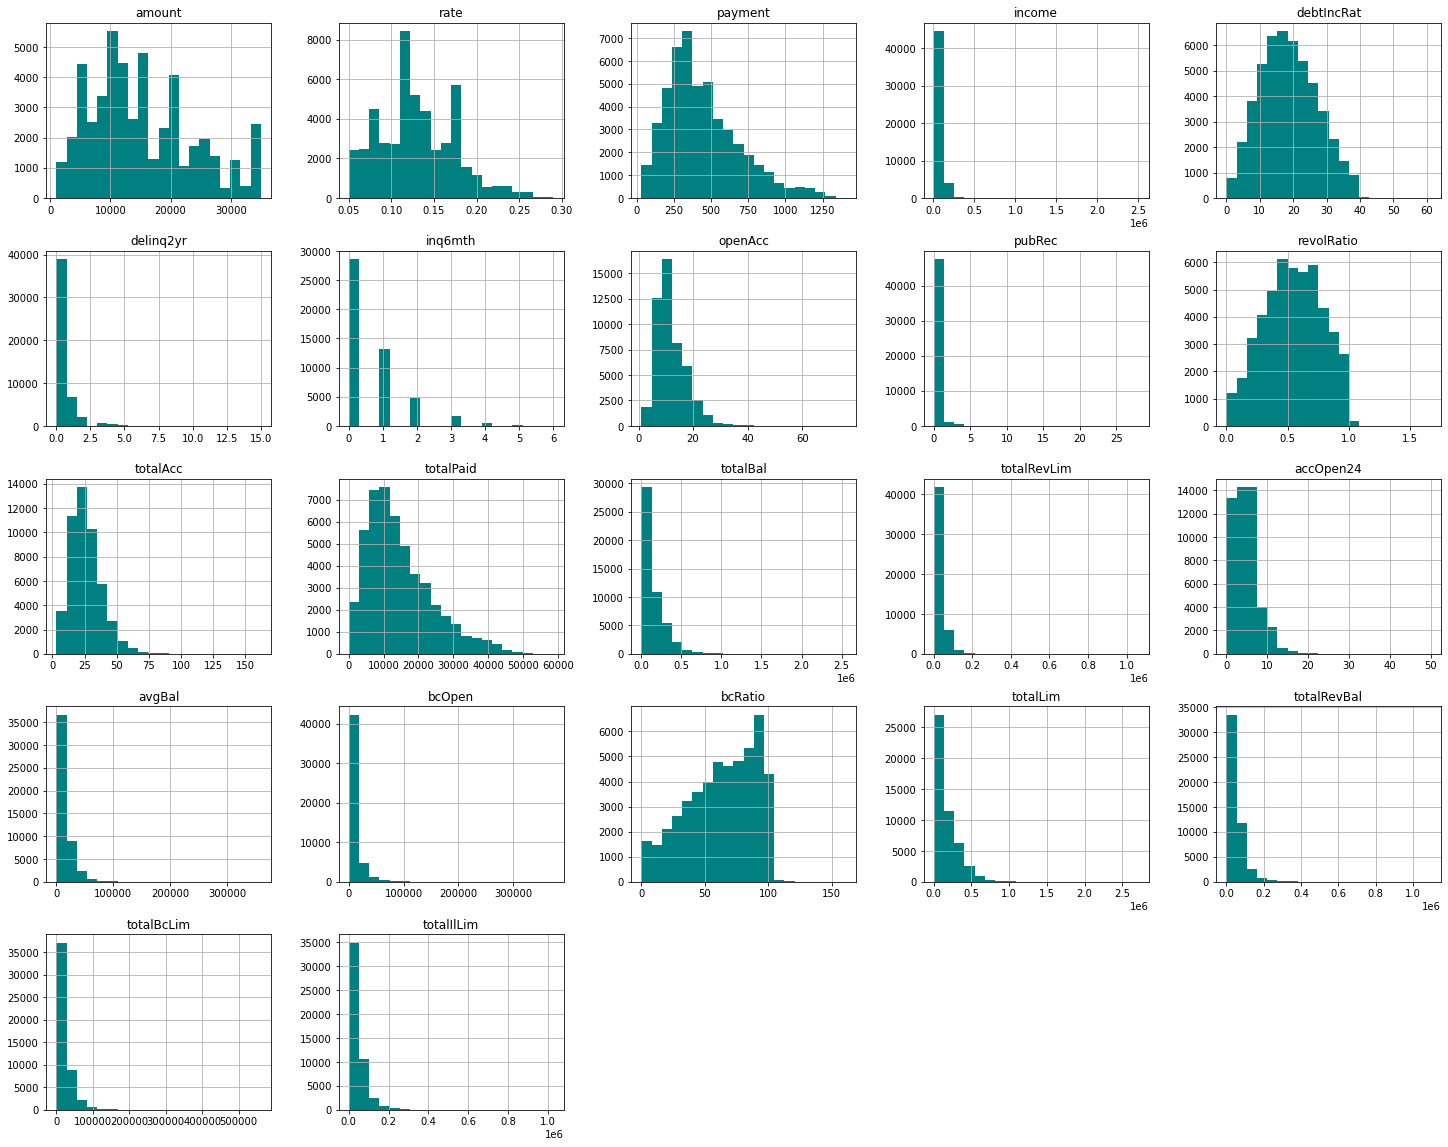

In [57]:
# Make histogram for all features (except loanID)
df.loc[:, df.columns!='loanID'].hist(figsize=(25,20), bins=20, color='teal')
plt.show()

**Next I check the stats for just entries that have defaulted and compare them against the overall stats.**

In [58]:
df[df['status']=='Default'].describe().T

,count,mean,std,min,25%,50%,75%,max
loanID,7580.0,324523.939314,193763.451786,151.00,150944.0000,322195.500,496491.0000,656694.00
amount,7580.0,15462.321900,8396.676509,1000.00,9600.0000,14400.000,20000.0000,35000.00
rate,7580.0,0.154826,0.043919,0.05,0.1300,0.150,0.1800,0.29
payment,7580.0,454.284425,243.128359,32.74,281.5300,399.200,578.6800,1382.36
income,7580.0,68942.161082,45715.128202,8796.00,43000.0000,60000.000,82000.0000,1300000.00
debtIncRat,7580.0,20.374083,8.629304,0.00,13.9375,20.210,26.5225,61.21
delinq2yr,7580.0,0.365567,0.955123,0.00,0.0000,0.000,0.0000,15.00
inq6mth,7580.0,0.825330,1.046784,0.00,0.0000,1.000,1.0000,6.00
openAcc,7580.0,12.123351,5.795677,2.00,8.0000,11.000,15.0000,76.00
pubRec,7580.0,0.266227,0.655722,0.00,0.0000,0.000,0.0000,19.00


In [59]:
overall_stats

,count,mean,std,min,25%,50%,75%,max
loanID,49999.0,327086.86,189492.01,16.00,163302.50,324657.00,491697.00,656727.00
amount,49999.0,15145.53,8527.77,1000.00,8500.00,13800.00,20000.00,35000.00
rate,49999.0,0.13,0.04,0.05,0.10,0.13,0.16,0.29
payment,49999.0,442.74,244.84,30.54,265.84,385.79,578.68,1407.01
income,49999.0,76173.79,65235.03,4000.00,46238.50,65000.00,90000.00,7446395.00
debtIncRat,49999.0,18.73,8.44,0.00,12.39,18.21,24.73,61.21
delinq2yr,49999.0,0.35,0.91,0.00,0.00,0.00,0.00,15.00
inq6mth,49999.0,0.64,0.94,0.00,0.00,0.00,1.00,6.00
openAcc,49999.0,11.85,5.52,1.00,8.00,11.00,15.00,76.00
pubRec,49999.0,0.23,0.62,0.00,0.00,0.00,0.00,28.00


**I was curious to see how many that were given a good grade (A was used to denote least risky, G most risky) was given out total vs. how many were given to accounts that default.**

In [60]:
overall_grades = df.value_counts(df['grade'])
charged_off_grades = df[df['status']=='Default'].value_counts(df['grade'])
grade_percent = 100 * charged_off_grades/overall_grades

In [61]:
grade_review = pd.concat([overall_grades, charged_off_grades, round(grade_percent, 2)], axis = 1)
grade_review.columns = ['overall', 'default', '%']
grade_review.sort_values(by='grade')

,overall,default,%
grade,,,
A,8169,390,4.77
B,13564,1258,9.27
C,13867,2284,16.47
D,8009,1881,23.49
E,4090,1194,29.19
F,1213,455,37.51
G,272,118,43.38


**Next I looked at the stats for just grade G.**

In [62]:
df[df['grade']=='G'].describe().T

,count,mean,std,min,25%,50%,75%,max
loanID,272.0,319864.551471,200143.780400,12772.00,115572.0000,325708.000,501641.5000,655917.00
amount,272.0,19937.959559,8185.120025,1000.00,12918.7500,18975.000,26981.2500,35000.00
rate,272.0,0.264301,0.014638,0.06,0.2600,0.260,0.2700,0.29
payment,272.0,612.363382,247.480696,40.19,396.7025,592.400,812.9625,1407.01
income,272.0,70843.970588,64500.110461,12527.00,45117.0000,60800.000,82000.0000,980000.00
debtIncRat,272.0,19.888603,8.602436,0.00,14.1600,19.985,26.0675,39.82
delinq2yr,272.0,0.349265,0.743533,0.00,0.0000,0.000,0.2500,5.00
inq6mth,272.0,1.386029,1.367070,0.00,0.0000,1.000,2.0000,6.00
openAcc,272.0,12.330882,6.053336,2.00,8.0000,11.000,14.0000,55.00
pubRec,272.0,0.257353,0.550026,0.00,0.0000,0.000,0.0000,3.00


In [63]:
df.shape

(49184, 32)

In [64]:
df.to_csv('data/02_clean_loans50k.csv') 